In [ ]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import numpy as np

In [ ]:
!pip install split_folders

In [ ]:
import splitfolders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/My Drive'

Mounted at /content/drive
 archive      'Colab Notebooks'   processed_data   resnet50_0.497.pkl
 archive.zip   DATASET		  processedData    ResNet50_Pest.h5


In [ ]:
input_folder = "/content/drive/MyDrive/archive/pest/train"
output = "/content/drive/MyDrive/processedData"
splitfolders.ratio(input_folder, output, seed=42, ratio=(.8, .2, 0))


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  6.31 files/s]
Copying files: 7 files [00:00, 31.33 files/s]
Copying files: 12 files [00:00, 36.47 files/s]
Copying files: 18 files [00:00, 43.95 files/s]
Copying files: 24 files [00:00, 44.38 files/s]
Copying files: 31 files [00:00, 49.50 files/s]
Copying files: 37 files [00:00, 49.01 files/s]
Copying files: 43 files [00:00, 51.61 files/s]
Copying files: 49 files [00:01, 51.09 files/s]
Copying files: 56 files [00:01, 54.26 files/s]
Copying files: 62 files [00:01, 52.31 files/s]
Copying files: 69 files [00:01, 54.94 files/s]
Copying files: 75 files [00:01, 52.50 files/s]
Copying files: 81 files [00:01, 54.08 files/s]
Copying files: 87 files [00:01, 51.00 files/s]
Copying files: 93 files [00:01, 53.34 files/s]
Copying files: 99 files [00:02, 52.07 files/s]
Copying files: 105 files [00:02, 53.46 files/s]
Copying files: 111 files [00:02, 51.89 files/s]
Copying files: 117 files [00:02, 53.12 files/s]
Copying files: 1

In [ ]:
help(splitfolders.ratio)

Help on function ratio in module splitfolders.split:

ratio(input, output='output', seed=1337, ratio=(0.8, 0.1, 0.1), group_prefix=None, move=False)



In [ ]:
img_height, img_width = (224, 224)
batch_size = 300
train_data_dir = r"/content/drive/MyDrive/archive/pest/train"
valid_data_dir =  r"/content/drive/MyDrive/processedData/val"
test_data_dir =  r"/content/drive/MyDrive/archive/pest/test"

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.4)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 1620 images belonging to 9 classes.


In [ ]:
valid_generator = train_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 216 images belonging to 9 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation'
)

Found 180 images belonging to 9 classes.


In [ ]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [ ]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
  layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['accuracy'])

model.fit(train_generator, epochs =10)

94765736/94765736 [==============================] - 3s 0us/step
Epoch 1/10
6/6 [==============================] - 593s 114s/step - loss: 3.0726 - accuracy: 0.3914
Epoch 2/10
6/6 [==============================] - 30s 5s/step - loss: 0.7223 - accuracy: 0.7679
Epoch 3/10
6/6 [==============================] - 30s 5s/step - loss: 0.3065 - accuracy: 0.9142
Epoch 4/10
6/6 [==============================] - 30s 5s/step - loss: 0.1599 - accuracy: 0.9537
Epoch 5/10
6/6 [==============================] - 29s 5s/step - loss: 0.0857 - accuracy: 0.9821
Epoch 6/10
6/6 [==============================] - 30s 5s/step - loss: 0.0473 - accuracy: 0.9932
Epoch 7/10
6/6 [==============================] - 30s 5s/step - loss: 0.0279 - accuracy: 0.9981
Epoch 8/10
6/6 [==============================] - 31s 5s/step - loss: 0.0180 - accuracy: 0.9994
Epoch 9/10
6/6 [==============================] - 30s 5s/step - loss: 0.0117 - accuracy: 1.0000
Epoch 10/10
6/6 [==============================] - 30s 5s/step - los

In [ ]:
model.save('/content/drive/MyDrive/REsNet50_Pest.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

180/180 - 5s - loss: 0.4327 - accuracy: 0.9111 - 5s/epoch - 28ms/step

Test accuracy: 0.9111111164093018


1/1 [==============================] - 0s 36ms/step


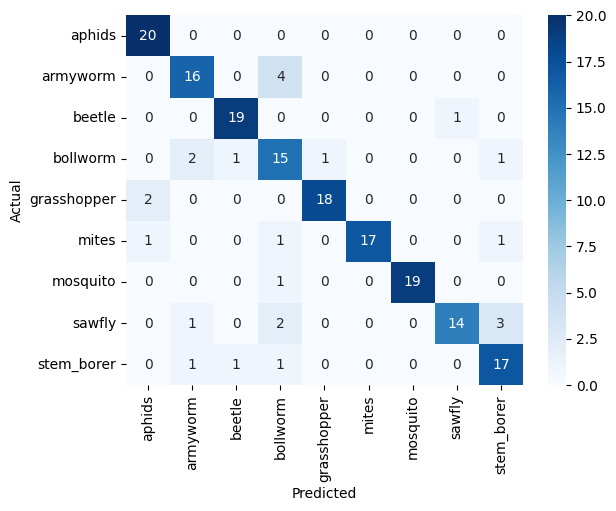

test accuracy : 86.11111111111111


In [ ]:
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt

model = tf.keras.models.load_model("/content/drive/MyDrive/REsNet50_Pest.h5")
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test, Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T, columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues',annot=True,fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))


FileUpload(value={}, description='Upload')

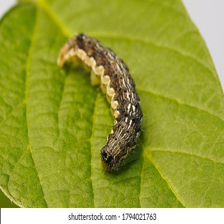

1/1 [==============================] - 1s 890ms/step
Predicted crop pest: bollworm


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from IPython.display import display
from PIL import Image
import ipywidgets as widgets
from IPython.display import display as ipydisplay
from io import BytesIO

# Load the saved model
model = tf.keras.models.load_model("/content/drive/MyDrive/REsNet50_Pest.h5")

# Function to preprocess the image and make predictions
def predict_crop_pest(img):
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create batch size of 1
    img_array = preprocess_input(img_array)  # Preprocess the image

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    return predicted_class_index

# Function to display the predicted class name
def display_prediction(class_index):
    # Map the class index to class name
    class_names = ['aphids', 'armyworm', 'beetle','bollworm','grasshopper','mites','mosquito','sawfly','stem_borer']  # Update with your actual class names
    predicted_class_name = class_names[class_index]
    return predicted_class_name

# Create file upload widget
uploader = widgets.FileUpload()
display(uploader)

def on_upload_change(change):
    if uploader.value:
        # Get uploaded image
        img = Image.open(BytesIO(uploader.data[-1]))
        img = img.resize((224, 224))  # Resize image to match ResNet50 input size
        ipydisplay(img)

        # Predict class index
        predicted_class_index = predict_crop_pest(img)

        # Display predicted class name
        predicted_class_name = display_prediction(predicted_class_index)
        print("Predicted crop pest:", predicted_class_name)

uploader.observe(on_upload_change, names='_counter')


In [ ]:
import tensorflow as tf
from keras.models import load_model

model = load_model("/content/drive/MyDrive/REsNet50_Pest.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]

lite_model = converter.convert()

with open("lite_modEl.tflite", "wb") as f:
    f.write(lite_model)